# Extract all tables from PDF into HTML Format

Below it's a simple example of using AnyParser to accurately extract the layout and text from a sample PDF into markdown format.

### 1. Load the libraries

If you have install `any_parser`, uncomment the below line.

In [1]:
# !pip3 install python-dotenv
# !pip3 install --upgrade any-parser
# !pip3 install PyPDF2 pdfplumber pdf2image

In [2]:
import os
from dotenv import load_dotenv
from pdf2image import convert_from_path
from IPython.display import HTML
from any_parser import AnyParser
import pandas as pd
from io import StringIO


### 2. Set up your AnyParser API key

To set up your `CAMBIO_API_KEY` API key, you will:

1. create a `.env` file in your root folder;
2. add the following one line to your `.env file:
    ```
    CAMBIO_API_KEY=17b************************
    ```

Then run the below line to load your API key.

In [3]:
load_dotenv(override=True)
example_apikey = os.getenv("CAMBIO_API_KEY")


### 3. Load the test sample data

Now let's load a sample data to test AnyParser's capabilities. AnyParser supports both image and PDF. 

Let's visualize [the sample PDF](https://www.stoxx.com/document/Indices/Common/Indexguide/stoxx_index_guide.pdf) first!

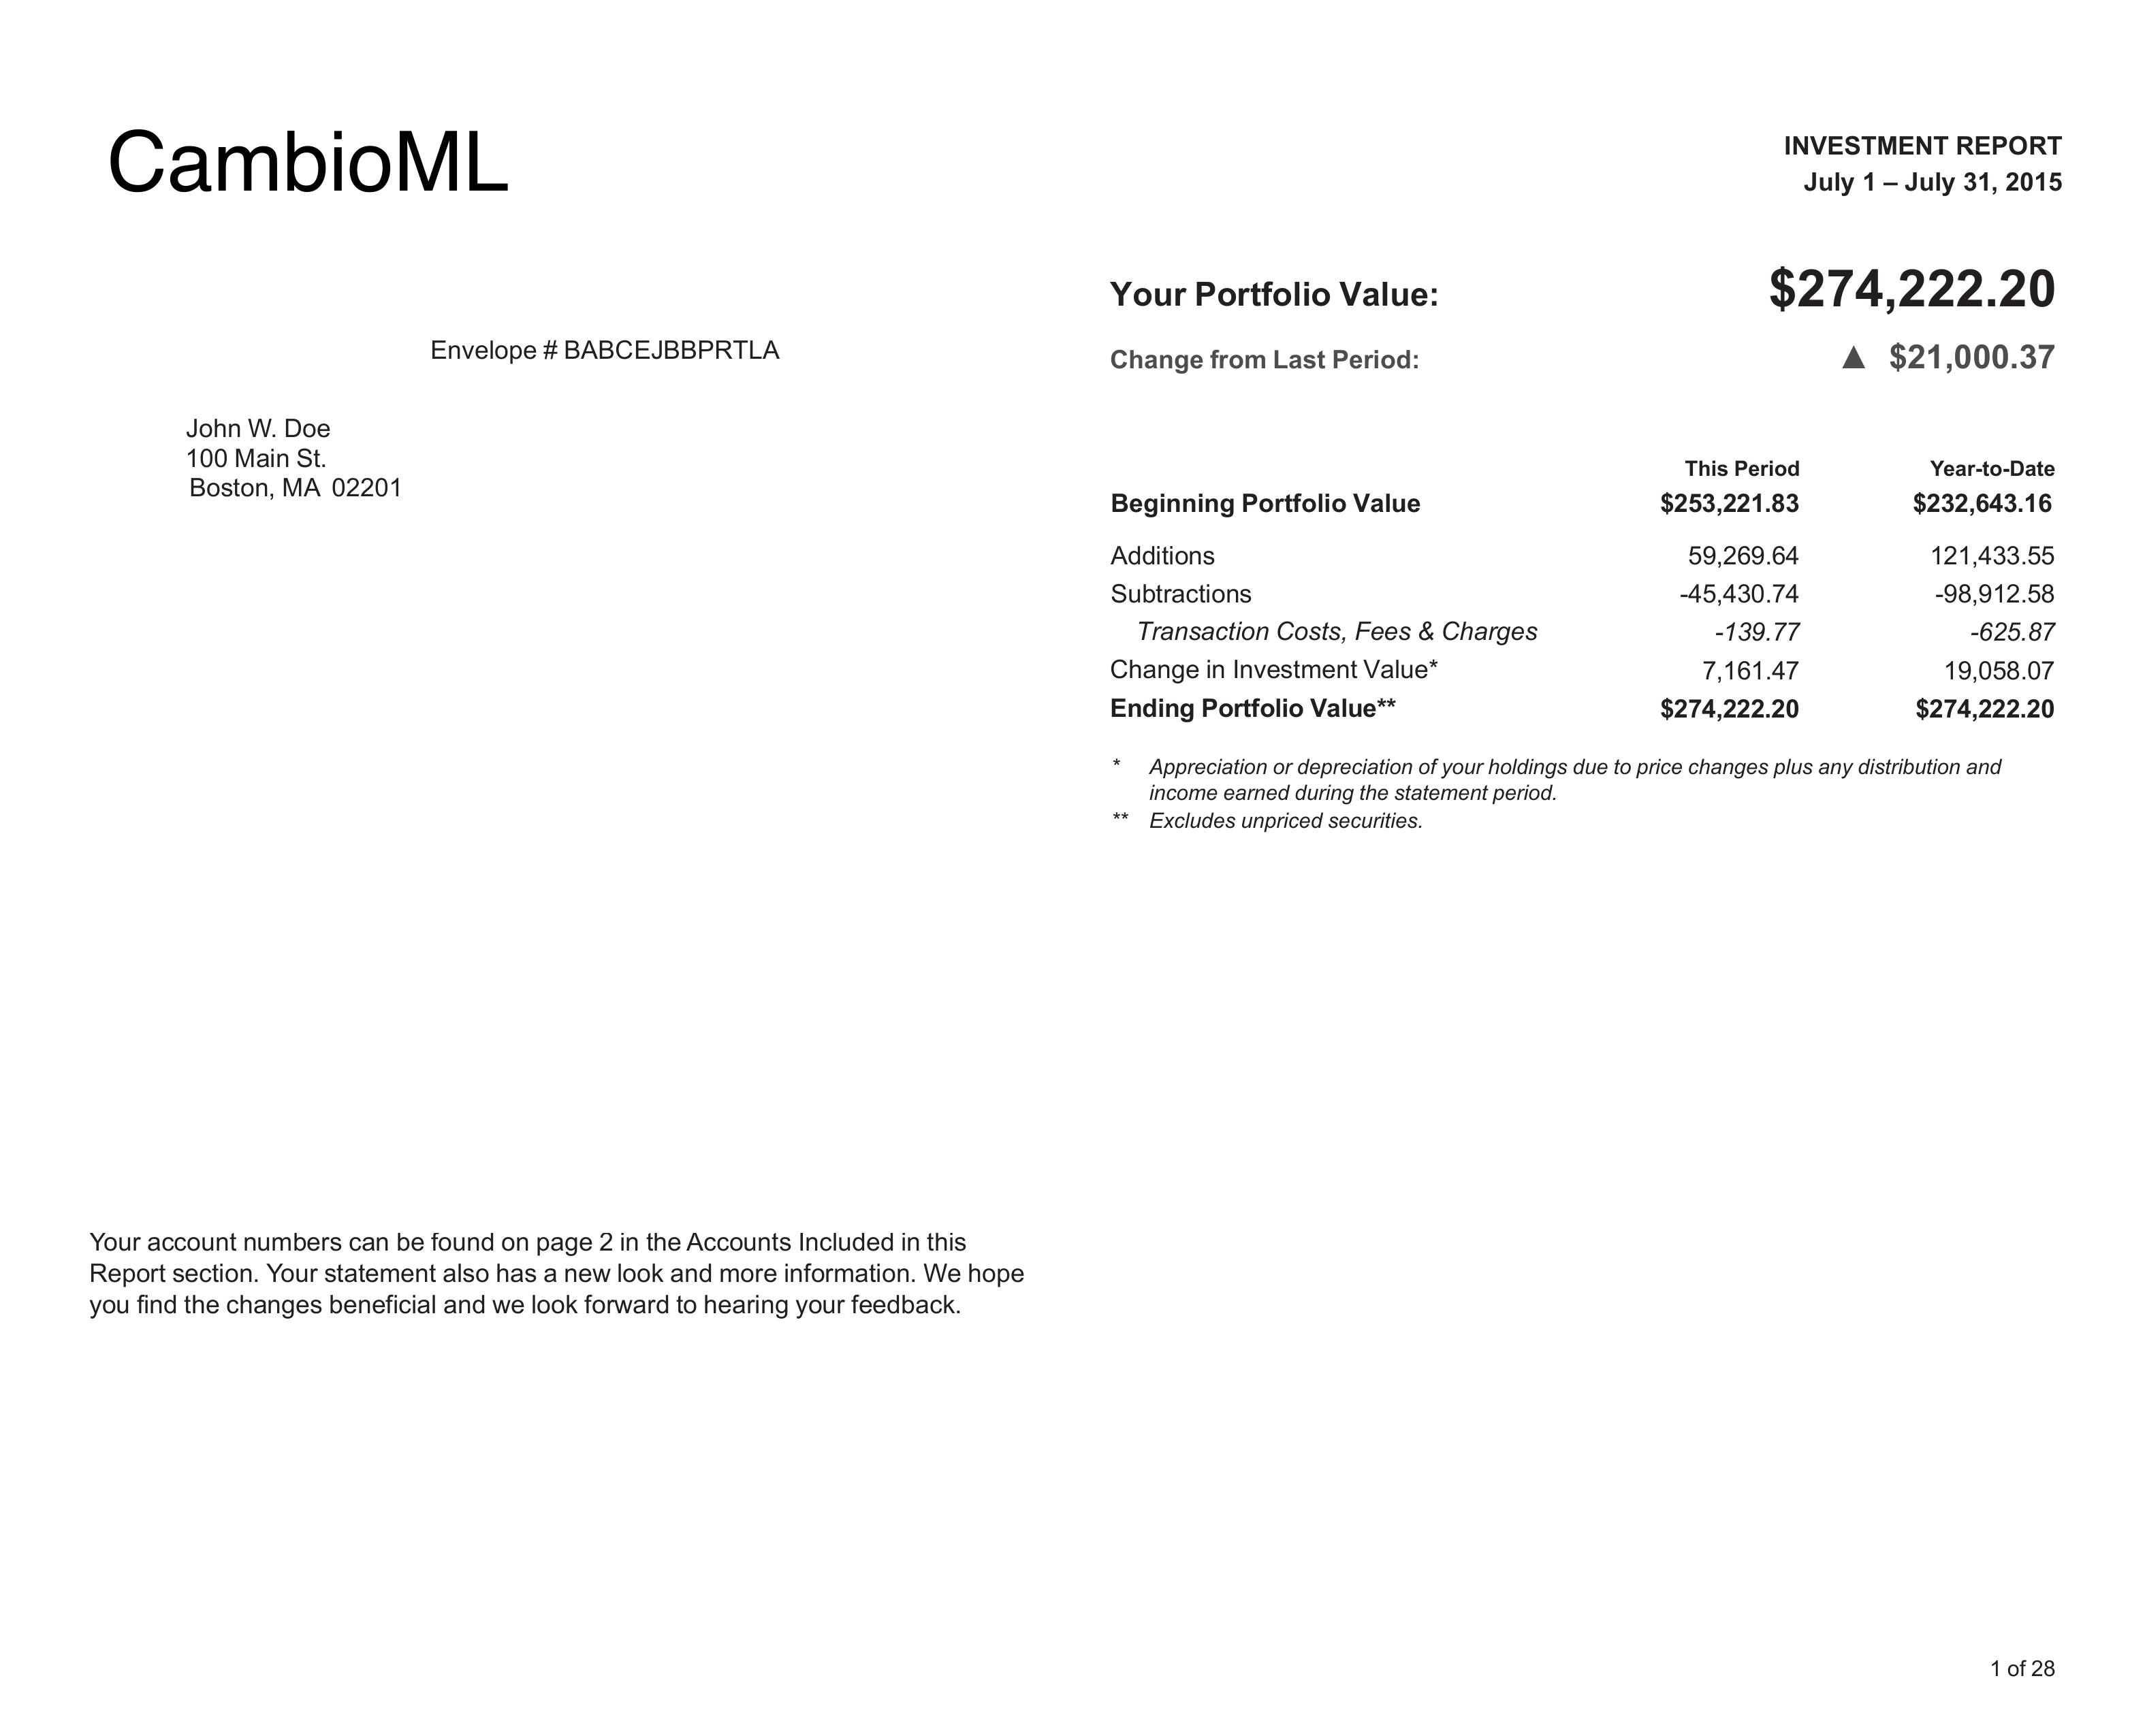

In [4]:
example_local_file = "./sample_data/sample_portfolio_statement.pdf"

# Convert PDF to a list of images
pages = convert_from_path(example_local_file, 300)  # 300 is the DPI

# Display the first page
display(pages[0])



### 4. Run AnyParser and Visualize the Output
We will run AnyParser on our sample data. The parse may take 1-20 seconds per page. We will output in HTML, JSON, and CSV formats. This is done by setting the `output_format` to `HTML`, `JSON`, or `CSV`. Optionally, add the `parse_type` set to `TABLE` to extract only tables, though this is currently the default and only option, and can be omitted.

#### HTML Output

In [5]:
op = AnyParser(example_apikey)
html_result = op.parse(example_local_file, parse_type="TABLE", output_format="HTML")

Finally, we will visualize the HTML output.

In [6]:
for content in html_result:
    display(HTML(content))

Beginning Portfolio Value,"This Period $253,221.83","Year-to-Date $232,643.16"
Additions,"59,269.64","121,433.55"
Subtractions,"-45,430.74","-98,912.58"
"Transaction Costs, Fees & Charges",-139.77,-625.87
Change in Investment Value*,"7,161.47","19,058.07"
Ending Portfolio Value**,"$274,222.20","$274,222.20"


Page,Account Type/Name,Account Number,Beginning Value,Ending Value
,GENERAL INVESTMENTS,,,
5,John W. Doe - Individual - TOD,111-111111,"$88,0853.95","$103,351.18"
,PERSONAL RETIREMENT,,,
23,John W. Doe - Traditional IRA,222-222222,"137,232.44","142,413.12"
,EDUCATION (529) ACCOUNTS,,,
29,John W. Doe - Education Account,333-333333,"27,935.44","28,457.90"
,,,"$253,221.83","$274,222.20"


,This Period,Year-to-Date
Taxable,$178.53,"$2,839.92"
Dividends,178.53,"1,548.74"
Interest,-,10.25
Short-term Capital Gains,-,255.68
Long-term Capital Gains,-,"1,025.25"
Tax-exempt,$372.10,"$3,384.74"
Dividends,-,"1,725.87"
Interest,372.10,"1,658.87"
Tax-deferred,$500.31,"$7,020.49"
Return of Capital,"$4,000.00","$8,500.00"


#### JSON Output

In [7]:
json_result = op.parse(example_local_file, parse_type="TABLE", output_format="JSON")

In [8]:
for json_content in json_result:
    print(json_content)

[{'Beginning Portfolio Value': 'Additions', 'This Period $253,221.83': '59,269.64', 'Year-to-Date $232,643.16': '121,433.55'}, {'Beginning Portfolio Value': 'Subtractions', 'This Period $253,221.83': '-45,430.74', 'Year-to-Date $232,643.16': '-98,912.58'}, {'Beginning Portfolio Value': 'Transaction Costs, Fees & Charges', 'This Period $253,221.83': '-139.77', 'Year-to-Date $232,643.16': '-625.87'}, {'Beginning Portfolio Value': 'Change in Investment Value*', 'This Period $253,221.83': '7,161.47', 'Year-to-Date $232,643.16': '19,058.07'}, {'Beginning Portfolio Value': 'Ending Portfolio Value**', 'This Period $253,221.83': '$274,222.20', 'Year-to-Date $232,643.16': '$274,222.20'}]
[{'Page': '', 'Account Type/Name': 'GENERAL INVESTMENTS', 'Account Number': '', 'Beginning Value': '', 'Ending Value': ''}, {'Page': '5', 'Account Type/Name': 'John W. Doe - Individual - TOD', 'Account Number': '111-111111', 'Beginning Value': '$88,0853.95', 'Ending Value': '$103,351.18'}, {'Page': '', 'Account

#### CSV Output

In [9]:
csv_result = op.parse(example_local_file, parse_type="TABLE", output_format="CSV")

In [10]:
for csv_content in csv_result:
    df = pd.read_csv(StringIO(csv_content))
    display(df)

,Beginning Portfolio Value,"This Period $253,221.83","Year-to-Date $232,643.16"
0,Additions,"59,269.64","121,433.55"
1,Subtractions,"-45,430.74","-98,912.58"
2,"Transaction Costs, Fees & Charges",-139.77,-625.87
3,Change in Investment Value*,"7,161.47","19,058.07"
4,Ending Portfolio Value**,"$274,222.20","$274,222.20"


,Page,Account Type/Name,Account Number,Beginning Value,Ending Value
0,NaN,GENERAL INVESTMENTS,NaN,NaN,NaN
1,5.0,John W. Doe - Individual - TOD,111-111111,"$88,0853.95","$103,351.18"
2,NaN,PERSONAL RETIREMENT,NaN,NaN,NaN
3,23.0,John W. Doe - Traditional IRA,222-222222,"137,232.44","142,413.12"
4,NaN,EDUCATION (529) ACCOUNTS,NaN,NaN,NaN
5,29.0,John W. Doe - Education Account,333-333333,"27,935.44","28,457.90"
6,NaN,NaN,NaN,"$253,221.83","$274,222.20"


,Unnamed: 0,This Period,Year-to-Date
0,Taxable,$178.53,"$2,839.92"
1,Dividends,178.53,"1,548.74"
2,Interest,-,10.25
3,Short-term Capital Gains,-,255.68
4,Long-term Capital Gains,-,"1,025.25"
5,Tax-exempt,$372.10,"$3,384.74"
6,Dividends,-,"1,725.87"
7,Interest,372.10,"1,658.87"
8,Tax-deferred,$500.31,"$7,020.49"
9,Return of Capital,"$4,000.00","$8,500.00"


## End of the notebook

Check more [case studies](https://www.cambioml.com/blog) of CambioML!

<a href="https://www.cambioml.com/" title="Title">
    <img src="./sample_data/cambioml_logo_large.png" style="height: 100px; display: block; margin-left: auto; margin-right: auto;"/>
</a>